<a href="https://colab.research.google.com/github/muntasha2900/Tubes4Python/blob/main/Tubes4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gholiyana Muntasha (1101172010)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
LtN= lambda x: 10**(x/10)

In [3]:
NtL= lambda x: 10*np.log10(x)

# **Path Loss Function**

In [4]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [8]:
# Input Path Loss
# fq is the frequency (150-2000 MHz)
# ht is the height of antenna transmitter (30-200 m)
# hr is the height of antenna receiver (1-20 m)
# d is the distance between the transmitter and receiver in m

fq1=700 #Mhz
fq2=900 #Mhz
fq3=1800 #MHz
loc1='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #dots
d=np.random.randint(dmin,dmax,N)

print(d)

[370 539 907 877 696 821 852 893 497 467 642 518 625 677 859 643 619 629
 503 940 588 753 557 329 485 854 733 468 836 511 819 581 321 874 602 853
 383 711 809 527 786 585 870 667 676 928 527 711 597 467 447 648 914 833
 333 905 981 979 748 718 976 597 964 881 783 821 539 578 356 474 953 646
 887 943 761 547 615 430 962 402 833 852 793 866 951 661 734 384 515 353
 609 770 780 927 585 673 321 374 696 692 785 730 631 542 583 710 362 887
 334 497 985 423 934 365 925 883 817 494 355 594 421 990 340 877 689 431
 912 542 338 961 524 308 510 439 837 368 322 356 454 794 770 619 855 620
 709 649 433 551 666 303 977 647 783 324 650 915 319 642 997 813 492 587
 543 448 980 678 743 362 770 787 583 816 953 940 648 906 854 788 332 760
 770 740 329 567 734 850 917 547 658 701 462 394 725 694 572 826 753 499
 806 880]


In [10]:
# Pathloss Cost 231 Model based on Area
LpUrban=cos(fq3,loc1,tower,user,d)
LpSubUrban=cos(fq3,loc2,tower,user,d)
LpOpen=cos(fq3,loc3,tower,user,d)

# Sort Distance for Area 
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSubUrban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

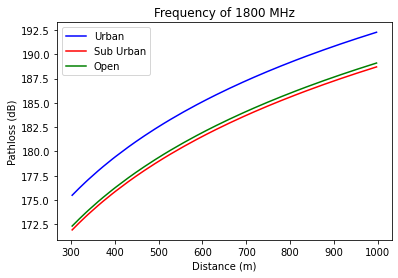

In [11]:
fig, ax = plt.subplots()
ax.plot(d_sort,Urban_sort, color='b', label='Urban')
ax.plot(d_sort,Suburban_sort, color='r', label='SubUrban')
ax.plot(d_sort,Open_sort, color='g', label='Open')
ax.set_title('Frequency of 1800 MHz')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Pathloss (dB)')
ax.legend(loc='upper left')
plt.show()

In [12]:
# Pathloss Cost 231 Model for Frequency (700MHz,900MHz,1800MHz)
LpUrbanFQ1=cos(fq1,loc1,tower,user,d)
LpUrbanFQ2=cos(fq2,loc1,tower,user,d)
LpUrbanFQ3=cos(fq3,loc1,tower,user,d)

# Sort Distance for Area 
d_sort=d[np.argsort(d)]
UrbanFQ_sort=LpUrbanFQ1[np.argsort(d)]
UrbanFQ2_sort=LpUrbanFQ2[np.argsort(d)]
UrbanFQ3_sort=LpUrbanFQ3[np.argsort(d)]

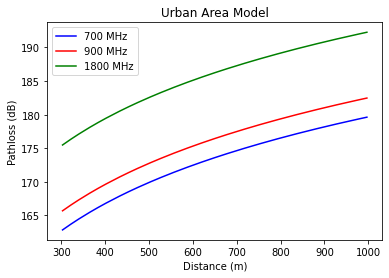

In [14]:
fig, ax = plt.subplots()
ax.plot(d_sort,UrbanFQ_sort, color='b', label='700 MHz')
ax.plot(d_sort,UrbanFQ2_sort, color='r', label='900 MHz')
ax.plot(d_sort,UrbanFQ3_sort, color='g', label='1800 MHz')
ax.set_title('Urban Area Model')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Pathloss (dB)')
ax.legend(loc='upper left')
plt.show()

# **Power Receive Model (Prx) function**

In [15]:
def ValuePrX(Ptx,Pl,Gtx,Grx):
  
  # Convert Transmitter Power from mW to dBm
  PtdB=NtL(Ptx)
  
  # Calculating the Value of PrX
  PrX=PtdB - Pl + Gtx + Grx

  # Convert Power Received from dBm to mW 
  PrXmW=LtN(PrX)

  return PrXmW

In [16]:
# Input for Power Received

# tx is the transmitter power
# Pl is path loss 
# gtx is the transmitter gain 
# grx is the  receiver gain 

tx = 30000 # mW
Pla = Urban_sort
Plb = Suburban_sort
Plc = Open_sort
Pld = UrbanFQ_sort
Ple = UrbanFQ2_sort
Plf = UrbanFQ3_sort
gtx = 10 # dB
grx = 2 # dB

In [17]:
# Power Received based on Area
PrxUrban = ValuePrX(tx, Pla, gtx, grx)
PrxSubUrban = ValuePrX(tx, Plb, gtx, grx)
PrxOpen = ValuePrX(tx, Plc, gtx, grx)

# Power Received based on Frequency
PrxUrban700  = ValuePrX(tx, Pld, gtx, grx)
PrxUrban900  = ValuePrX(tx, Ple, gtx, grx)
PrxUrban1800 = ValuePrX(tx, Plf, gtx, grx)

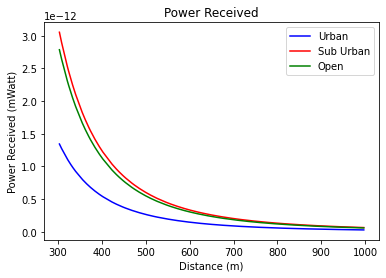

In [18]:
fig, ax = plt.subplots()
ax.plot(d_sort,PrxUrban, color='b', label='Urban')
ax.plot(d_sort,PrxSubUrban, color='r', label='SubUrban')
ax.plot(d_sort,PrxOpen, color='g', label='Open')
ax.set_title('Power Received')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Received (mWatt)')
ax.legend(loc='upper right')
plt.show()

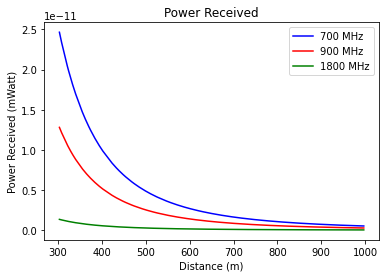

In [19]:
fig, ax = plt.subplots()
ax.plot(d_sort,PrxUrban700, color='b', label='700 MHz')
ax.plot(d_sort,PrxUrban900, color='r', label='900 MHz')
ax.plot(d_sort,PrxUrban1800, color='g', label='1800 MHz')
ax.set_title('Power Received')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Received (mWatt)')
ax.legend(loc='upper right')
plt.show()

# **SNR Function**

In [31]:
def SNRf(Prx,BW):

  # Calculating No to BW
  No=-174+10*np.log10(BW)

  # Converting No in BW to Numeric
  NoW=LtN(No)

  # Calculating SNR Value
  SNR= Prx/NoW

  return SNR

In [21]:
# Input for SNR Model

# prx is the power received 
# bw is the given bandwith value

Prx1 = PrxUrban
Prx2 = PrxSubUrban
Prx3 = PrxOpen
Prx4 = PrxUrban700
Prx5 = PrxUrban900
Prx6 = PrxUrban1800
BW   = 50000000

In [23]:
# Define SNR Model for Area by the given input
SNRUrban = SNRf(Prx1,BW)
SNRSubUrban = SNRf(Prx2,BW)
SNROpen = SNRf(Prx3,BW)

# Define SNR Model for Frequency by the given input
SNRUrban700 = SNRf(Prx4,BW)
SNRUrban900 = SNRf(Prx5,BW)
SNRUrban1800 = SNRf(Prx6,BW)

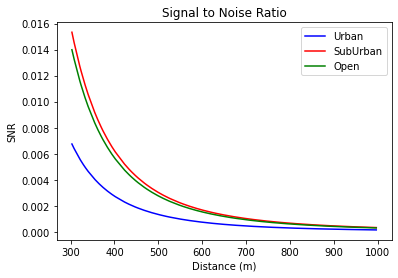

In [44]:
fig, ax = plt.subplots()
ax.plot(d_sort,SNRUrban, color='b', label='Urban')
ax.plot(d_sort,SNRSubUrban, color='r', label='SubUrban')
ax.plot(d_sort,SNROpen, color='g', label='Open')
ax.set_title('Signal to Noise Ratio')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
plt.show()

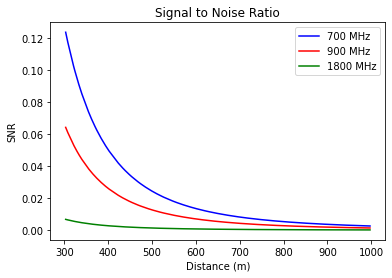

In [45]:
fig, ax = plt.subplots()
ax.plot(d_sort,SNRUrban700, color='b', label='700 MHz')
ax.plot(d_sort,SNRUrban900, color='r', label='900 MHz')
ax.plot(d_sort,SNRUrban1800, color='g', label='1800 MHz')
ax.set_title('Signal to Noise Ratio')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
plt.show()

# **Capacity Function**

In [35]:
 def Capacity(SNR,BW):
  # Cell Capacity
  Celcap = BW*np.log2(1+SNR)
  return Celcap

In [36]:
# Input of the Capacity

# SNR is the signal to noise ratio 
# BW is the given bandwith value

SNR1 = SNRUrban
SNR2 = SNRSubUrban
SNR3 = SNROpen
SNR4 = SNRUrban700
SNR5 = SNRUrban900
SNR6 = SNRUrban1800
BW   = 50000000

In [38]:
# Cell Capacity Model based on Area
celcapUrban = Capacity(SNR1, BW)
celcapSubUrban = Capacity(SNR2, BW)
celcapOpen = Capacity(SNR3, BW)

# Cell Capacity Model based on Frequency
celcapUrban700 = Capacity(SNR4, BW)
celcapUrban900 = Capacity(SNR5, BW)
celcapUrban1800 = Capacity(SNR6, BW)

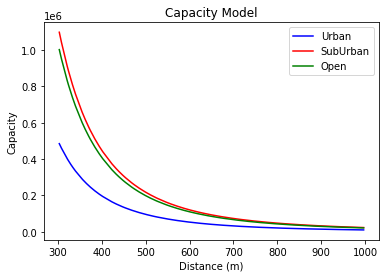

In [40]:
fig, ax = plt.subplots()
ax.plot(d_sort,celcapUrban, color='b', label='Urban')
ax.plot(d_sort,celcapSubUrban, color='r', label='SubUrban')
ax.plot(d_sort,celcapOpen, color='g', label='Open')
ax.set_title('Capacity Model')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper right')
plt.show()

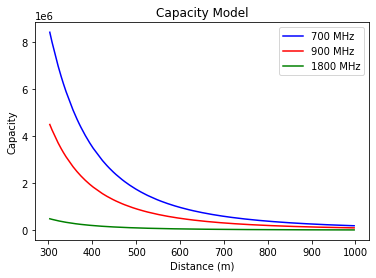

In [43]:
fig, ax = plt.subplots()
ax.plot(d_sort,celcapUrban700, color='b', label='700 MHz')
ax.plot(d_sort,celcapUrban900, color='r', label='900 MHz')
ax.plot(d_sort,celcapUrban1800, color='g', label='1800 MHz')
ax.set_title('Capacity Model')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper right')
plt.show()